<a href="https://colab.research.google.com/github/aiswaryam2005/Caste-and-Migration-Hate-Speech-Detection-using-Machine-Learning/blob/main/ml_miniproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_csv("/content/drive/MyDrive/train.csv")
df

,id,text,label
0,4694,தமிழ்நாடுக்கு சிறப்பு அதிகாரம் வேண்டும்.வடக்கன...,0
1,3725,Holi festival .so they go to native. 12 hours...,0
2,2469,"மதம், இனம், மொழி, நாடு, சாதி, பணக்காரன், ஏழை, ...",1
3,2637,Like this one day all these North Indias are g...,1
4,244,### I use to respect tamilians a lost but the ...,0
...,...,...,...
5350,3504,Ellarum 10 varusam 15 varusam soldranga ithell...,0
5351,4979,@yogeshwaran2530 naa mumbai la dhaan irukkuren,0
5352,5198,தமிழன் பின் வரும் காலங்களில் பிச்சை எடுக்கும் ...,0
5353,7570,வடகலை/தென்கலை மொத்தமா எல்லோருமே கிருக்கு கூ..ய...,1


In [ ]:
df.iloc[5323].text

'\xa0@trustucan8833\xa0 no I am Thuluvavellalar I am not agamudayar engala o kooda sekatha nanga vera nee mukkulathula pothikittu iru enga kooda serapaakatha'

In [ ]:
x=df["text"]
y=df["label"]
print(x)
print(y)

0       தமிழ்நாடுக்கு சிறப்பு அதிகாரம் வேண்டும்.வடக்கன...
1       Holi festival  .so they go to native. 12 hours...
2       மதம், இனம், மொழி, நாடு, சாதி, பணக்காரன், ஏழை, ...
3       Like this one day all these North Indias are g...
4       ### I use to respect tamilians a lost but the ...
                              ...                        
5350    Ellarum 10 varusam 15 varusam soldranga ithell...
5351     @yogeshwaran2530   naa mumbai la dhaan irukkuren
5352    தமிழன் பின் வரும் காலங்களில் பிச்சை எடுக்கும் ...
5353    வடகலை/தென்கலை மொத்தமா எல்லோருமே கிருக்கு கூ..ய...
5354    Kolkatta karanai kandippa check pannanum kaara...
Name: text, Length: 5355, dtype: object
0       0
1       0
2       1
3       1
4       0
       ..
5350    0
5351    0
5352    0
5353    1
5354    0
Name: label, Length: 5355, dtype: int64


In [ ]:
vectorizer=TfidfVectorizer()
x_tfidf=vectorizer.fit_transform(x)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x_tfidf,y,test_size=0.3,random_state=42)
knn_classifier=KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(x_train,y_train)
y_pred=knn_classifier.predict(x_test)

In [ ]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)

Accuracy: 0.627255756067206


In [ ]:
test=pd.read_csv("/content/drive/MyDrive/test.csv")
test

,id,text
0,7048,P S seriya sonninga bro.... summa suyalabathuk...
1,504,Ava avan kashtam avanku... Enda adichtu savure...
2,6503,@dkv6838 வைப்பாட்டி மகனே கதறாத. எனக்கு வரலாற...
3,4225,Dai setu kamanati naya avana serupala adichi t...
4,2474,Harey mera vadakan wale Definitely Tamilnadu ...
...,...,...
1570,890,@fayaz7235 i am were talking about Europe u ...
1571,6909,@karthikt3852 mattukkara payale. Naan katran...
1572,6994,@easkkipaandian3335 அரசியல் பன்ன இப்படிதான் ...
1573,1794,எவ்வளவு பேசினாலும் தொள்ளாயிரமாண்டுகளாக திருட்ட...


In [ ]:
test_tfidf=vectorizer.transform(test["text"])

In [ ]:
pred=knn_classifier.predict(test_tfidf)
pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
for i,label in enumerate(pred):
  print(f"Test sentence{i+1}:{'Found' if label == 1 else 'Notfound'}")

Test sentence1:Notfound
Test sentence2:Notfound
Test sentence3:Notfound
Test sentence4:Notfound
Test sentence5:Notfound
Test sentence6:Notfound
Test sentence7:Found
Test sentence8:Notfound
Test sentence9:Notfound
Test sentence10:Notfound
Test sentence11:Notfound
Test sentence12:Notfound
Test sentence13:Notfound
Test sentence14:Notfound
Test sentence15:Notfound
Test sentence16:Notfound
Test sentence17:Notfound
Test sentence18:Notfound
Test sentence19:Notfound
Test sentence20:Notfound
Test sentence21:Notfound
Test sentence22:Notfound
Test sentence23:Notfound
Test sentence24:Notfound
Test sentence25:Notfound
Test sentence26:Notfound
Test sentence27:Notfound
Test sentence28:Notfound
Test sentence29:Notfound
Test sentence30:Notfound
Test sentence31:Notfound
Test sentence32:Notfound
Test sentence33:Notfound
Test sentence34:Notfound
Test sentence35:Notfound
Test sentence36:Notfound
Test sentence37:Notfound
Test sentence38:Notfound
Test sentence39:Notfound
Test sentence40:Notfound
Test sentenc

In [ ]:
dt=DecisionTreeClassifier(criterion="entropy")
dt.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
dt_pred=dt.predict(x_test)
dt_pred

array([1, 0, 0, ..., 1, 0, 0])

In [ ]:
accuracy=accuracy_score(y_test,dt_pred)
accuracy

0.6932171748599876

In [ ]:
predict=dt.predict(test_tfidf)
predict

array([0, 0, 1, ..., 0, 0, 1])

In [ ]:
for i,label in enumerate(predict):
  print(f"Test sentence{i+1}:{'Found' if label == 1 else 'Notfound'}")

Test sentence1:Notfound
Test sentence2:Notfound
Test sentence3:Found
Test sentence4:Found
Test sentence5:Notfound
Test sentence6:Notfound
Test sentence7:Notfound
Test sentence8:Found
Test sentence9:Notfound
Test sentence10:Notfound
Test sentence11:Notfound
Test sentence12:Notfound
Test sentence13:Notfound
Test sentence14:Notfound
Test sentence15:Found
Test sentence16:Notfound
Test sentence17:Found
Test sentence18:Found
Test sentence19:Found
Test sentence20:Found
Test sentence21:Notfound
Test sentence22:Notfound
Test sentence23:Notfound
Test sentence24:Found
Test sentence25:Notfound
Test sentence26:Found
Test sentence27:Found
Test sentence28:Notfound
Test sentence29:Notfound
Test sentence30:Notfound
Test sentence31:Found
Test sentence32:Found
Test sentence33:Notfound
Test sentence34:Found
Test sentence35:Found
Test sentence36:Notfound
Test sentence37:Notfound
Test sentence38:Notfound
Test sentence39:Found
Test sentence40:Found
Test sentence41:Notfound
Test sentence42:Notfound
Test sente

In [ ]:
model = GaussianNB()
model.fit(x_train.toarray(), y_train)

GaussianNB()

In [ ]:
predicted = model.predict(x_test.toarray())
predicted

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
accuracy=accuracy_score(y_test,predicted)
accuracy

0.5992532669570628

In [ ]:
test_predicted=model.predict(test_tfidf.toarray())
test_predicted

array([0, 0, 1, ..., 0, 0, 1])

In [ ]:
for i,label in enumerate(test_predicted):
  print(f"Test sentence{i+1}:{'Found' if label == 1 else 'Notfound'}")

Test sentence1:Notfound
Test sentence2:Notfound
Test sentence3:Found
Test sentence4:Found
Test sentence5:Notfound
Test sentence6:Notfound
Test sentence7:Found
Test sentence8:Found
Test sentence9:Found
Test sentence10:Notfound
Test sentence11:Notfound
Test sentence12:Found
Test sentence13:Notfound
Test sentence14:Found
Test sentence15:Found
Test sentence16:Found
Test sentence17:Found
Test sentence18:Notfound
Test sentence19:Found
Test sentence20:Found
Test sentence21:Notfound
Test sentence22:Found
Test sentence23:Notfound
Test sentence24:Found
Test sentence25:Notfound
Test sentence26:Found
Test sentence27:Found
Test sentence28:Found
Test sentence29:Notfound
Test sentence30:Found
Test sentence31:Found
Test sentence32:Notfound
Test sentence33:Notfound
Test sentence34:Found
Test sentence35:Notfound
Test sentence36:Found
Test sentence37:Found
Test sentence38:Notfound
Test sentence39:Notfound
Test sentence40:Notfound
Test sentence41:Notfound
Test sentence42:Found
Test sentence43:Notfound
Tes

In [ ]:
sample_df1=pd.read_csv("/content/drive/MyDrive/test.csv")
sample_df1=sample_df1.drop(['text'], axis=1)
sample_df1.head()

,id
0,7048
1,504
2,6503
3,4225
4,2474


In [ ]:
sample_df1[" "]=pred
sample_df1.head()

,id,
0,7048,0
1,504,0
2,6503,0
3,4225,0
4,2474,0


In [ ]:

sample_df1
sample_df1.columns=[" "," "]

In [ ]:
sample_df1.to_csv("DSNLP.run1.csv")

In [ ]:
from google.colab import files
files.download("DSNLP.run1.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
sample_df2=pd.read_csv("/content/drive/MyDrive/test.csv")
sample_df2=sample_df2.drop(['text'], axis=1)
sample_df2.head()

,id
0,7048
1,504
2,6503
3,4225
4,2474


In [ ]:
sample_df2[" "]=predict
sample_df2.head()

,id,
0,7048,0
1,504,0
2,6503,1
3,4225,1
4,2474,0


In [ ]:
sample_df2.columns=[" "," "]
sample_df2

,,
0,7048,0
1,504,0
2,6503,1
3,4225,1
4,2474,0
...,...,...
1570,890,1
1571,6909,1
1572,6994,0
1573,1794,0


In [ ]:
sample_df2.to_csv("DSNLP.run2.csv")

In [ ]:
files.download("DSNLP.run2.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
sample_df3=pd.read_csv("/content/drive/MyDrive/test.csv")
sample_df3=sample_df3.drop(['text'], axis=1)
sample_df3.head()

,id
0,7048
1,504
2,6503
3,4225
4,2474


In [ ]:
sample_df3[" "]=test_predicted
sample_df3.head()

,id,
0,7048,0
1,504,0
2,6503,1
3,4225,1
4,2474,0


In [ ]:
sample_df3.columns=[" "," "]
sample_df3

,,
0,7048,0
1,504,0
2,6503,1
3,4225,1
4,2474,0
...,...,...
1570,890,0
1571,6909,1
1572,6994,0
1573,1794,0


In [ ]:
sample_df3.to_csv("DSNLP.run3.csv")

In [ ]:
files.download("DSNLP.run3.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
dff=pd.read_csv("/content/drive/MyDrive/test_with_labels.csv")
dff

,id,text,label
0,7048,P S seriya sonninga bro.... summa suyalabathuk...,0
1,504,Ava avan kashtam avanku... Enda adichtu savure...,0
2,6503,@dkv6838 வைப்பாட்டி மகனே கதறாத. எனக்கு வரலாற...,1
3,4225,Dai setu kamanati naya avana serupala adichi t...,0
4,2474,Harey mera vadakan wale Definitely Tamilnadu ...,0
...,...,...,...
1570,890,@fayaz7235 i am were talking about Europe u ...,1
1571,6909,@karthikt3852 mattukkara payale. Naan katran...,1
1572,6994,@easkkipaandian3335 அரசியல் பன்ன இப்படிதான் ...,0
1573,1794,எவ்வளவு பேசினாலும் தொள்ளாயிரமாண்டுகளாக திருட்ட...,0


In [ ]:
a=dff['label']
a

,label
0,0
1,0
2,1
3,0
4,0
...,...
1570,1
1571,1
1572,0
1573,0


In [ ]:
f1=f1_score(a,pred)
print(f1)

0.07430340557275542


In [ ]:
f2=f1_score(a,predict)
print(f2)

0.5768282662284305


In [ ]:
f3=f1_score(a,test_predicted)
print(f3)

0.5905511811023622


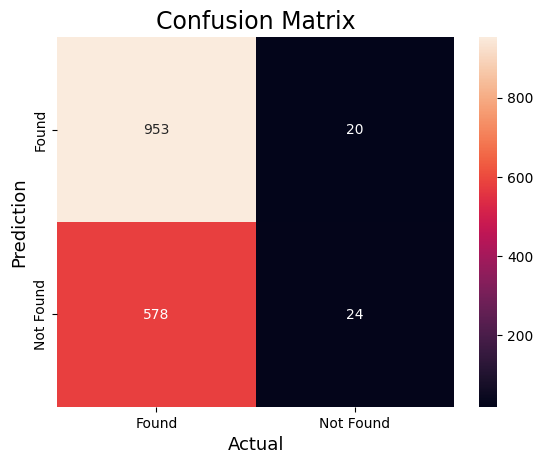

In [ ]:
cm=confusion_matrix(a,pred)
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Found','Not Found'],
            yticklabels=['Found','Not Found'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [ ]:
print(classification_report(a, pred))

              precision    recall  f1-score   support

           0       0.62      0.98      0.76       973
           1       0.55      0.04      0.07       602

    accuracy                           0.62      1575
   macro avg       0.58      0.51      0.42      1575
weighted avg       0.59      0.62      0.50      1575



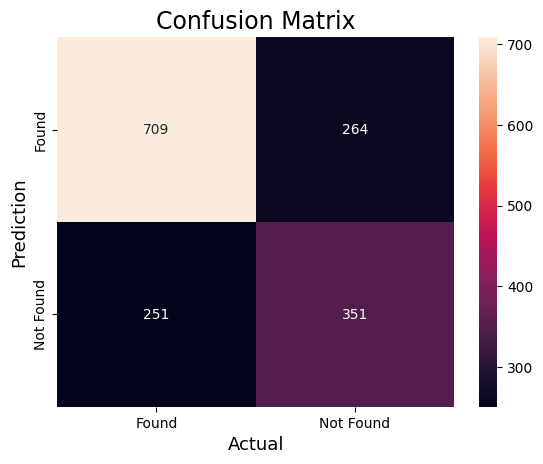

In [ ]:
cm=confusion_matrix(a,predict)
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Found','Not Found'],
            yticklabels=['Found','Not Found'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [ ]:
print(classification_report(a, predict))

              precision    recall  f1-score   support

           0       0.74      0.73      0.73       973
           1       0.57      0.58      0.58       602

    accuracy                           0.67      1575
   macro avg       0.65      0.66      0.66      1575
weighted avg       0.67      0.67      0.67      1575



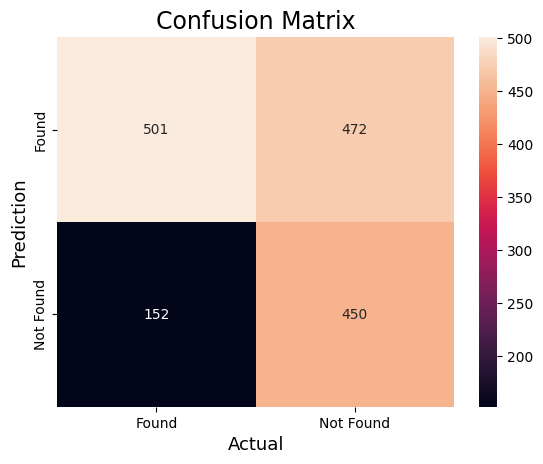

In [ ]:
cm=confusion_matrix(a,test_predicted)
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Found','Not Found'],
            yticklabels=['Found','Not Found'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [ ]:
print(classification_report(a,test_predicted))

              precision    recall  f1-score   support

           0       0.77      0.51      0.62       973
           1       0.49      0.75      0.59       602

    accuracy                           0.60      1575
   macro avg       0.63      0.63      0.60      1575
weighted avg       0.66      0.60      0.61      1575



#Deployment

In [ ]:
!pip install gradio

In [ ]:
import joblib
joblib.dump(knn_classifier, "knn_model.pkl")
joblib.dump(dt, "dt_model.pkl")
joblib.dump(model, "nb_model.pkl")

['nb_model.pkl']

In [ ]:
knn_model = joblib.load("knn_model.pkl")
dt_model = joblib.load("dt_model.pkl")
nb_model = joblib.load("nb_model.pkl")

In [ ]:
joblib.dump(vectorizer, "vectorizer.pkl")

['vectorizer.pkl']

In [ ]:
def predict(text):
    try:
        # Vectorize the input and convert to dense
        input_vector = vectorizer.transform([text]).toarray()

        # Make predictions
        knn_result = knn_model.predict(input_vector)[0]
        dt_result = dt_model.predict(input_vector)[0]
        nb_result = nb_model.predict(input_vector)[0]

        label_map = {0: "Not Hate Speech", 1: "Hate Speech"}

        return (
            label_map[knn_result],
            label_map[dt_result],
            label_map[nb_result]
        )

    except Exception as e:
        return f"Error: {e}", f"Error: {e}", f"Error: {e}"


In [ ]:
import gradio as gr

interface = gr.Interface(
    fn=predict,
    inputs=gr.Textbox(lines=2, placeholder="Enter a comment"),
    outputs=[
        gr.Text(label="KNN Prediction"),
        gr.Text(label="Decision Tree Prediction"),
        gr.Text(label="Naive Bayes Prediction")
    ],
    title="Hate Speech Detection",
    description="Enter a comment to detect hate speech using ML models."
)

interface.launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://d6905ac8cb704b1554.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
